In [24]:
import json
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import nltk
seed = 208
import re

In [2]:
# Load data
f = open('../data/train.json','r', encoding = 'utf-8')
data = pd.read_json(f)
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


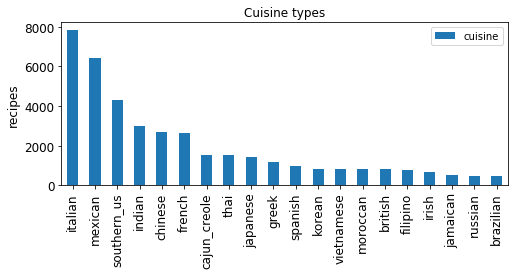

In [3]:
# Visualize the number of cuisines 
ax = data['cuisine'].value_counts().plot(kind='bar', title ="Cuisine types", figsize=(8, 3), legend=True, fontsize=12)
ax.set_ylabel("recipes", fontsize=12)
plt.show()

In [66]:
# Reformat the documents for vectorization
from nltk.stem import WordNetLemmatizer
wpt = nltk.WordPunctTokenizer()
corpus = [' '.join(doc) for doc in data["ingredients"]]
corpus1 = [wpt.tokenize(line) for line in corpus]
corpus2 = []
lemmatizer = WordNetLemmatizer()
for cuisine in corpus1:
    p = [lemmatizer.lemmatize(tok,pos='n')for tok in cuisine]
    p1 = [re.sub(r'[^a-zA-Z\s]', '', tok, re.I|re.A) for tok in p]
    p3 = ' '.join(p1)
    corpus2.append(p3)
corpus2

['romaine lettuce black olive grape tomato garlic pepper purple onion seasoning garbanzo bean feta cheese crumbles',
 'plain flour ground pepper salt tomato ground black pepper thyme egg green tomato yellow corn meal milk vegetable oil',
 'egg pepper salt mayonaise cooking oil green chilies grilled chicken breast garlic powder yellow onion soy sauce butter chicken liver',
 'water vegetable oil wheat salt',
 'black pepper shallot cornflour cayenne pepper onion garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf',
 'plain flour sugar butter egg fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder',
 'olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley skirt steak white vinegar sea salt bay leaf chorizo sausage',
 'sugar pistachio nut white almond bark flour vanilla extract olive oil

'zatarains'

In [74]:
# convert text to word frequency vectors with TfidfVectorizer.
vectorizer = TfidfVectorizer() 
tfidf = vectorizer.fit_transform(corpus2)
#pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
tfidf.shape

(39774, 2815)

In [132]:
# convert text to word count vectors with CountVectorizer.
vec = CountVectorizer()
X = vec.fit_transform(corpus2)
dtm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(dtm.columns)

Index(['aai', 'abalone', 'abbamele', 'absinthe', 'abura', 'acai', 'accent',
       'accompaniment', 'achiote', 'acid',
       ...
       'yuzukosho', 'za', 'zatarain', 'zatarains', 'zero', 'zest', 'zesty',
       'zinfandel', 'ziti', 'zucchini'],
      dtype='object', length=2815)


In [137]:
np.savetxt('test.txt', dtm.columns, delimiter=" ", fmt="%s")

In [142]:
def by_size(words, size):
    return [word for word in words if len(word) == size]

In [141]:
dtm.columns

Index(['aai', 'abalone', 'abbamele', 'absinthe', 'abura', 'acai', 'accent',
       'accompaniment', 'achiote', 'acid',
       ...
       'yuzukosho', 'za', 'zatarain', 'zatarains', 'zero', 'zest', 'zesty',
       'zinfandel', 'ziti', 'zucchini'],
      dtype='object', length=2815)

In [148]:
dtm = dtm[dtm.columns.difference(by_size(dtm.columns,2))]

In [75]:
# encode strings to integer
y = LabelEncoder().fit_transform(data["cuisine"])

In [149]:
# Randomly split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(dtm, y, test_size = 0.3, random_state = seed)
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train,  y_train)
# make predictions
yhat = model.predict(X_test)
# model accuracy for X_test   
accuracy = model.score(X_test, y_test) 
# creating a confusion matrix 
cm = confusion_matrix(y_test, yhat)

C:\Users\57609\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [150]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.54      0.63       141
           1       0.58      0.34      0.43       244
           2       0.78      0.68      0.73       425
           3       0.80      0.85      0.82       759
           4       0.78      0.60      0.68       235
           5       0.60      0.62      0.61       810
           6       0.80      0.72      0.76       381
           7       0.86      0.91      0.89       965
           8       0.67      0.51      0.58       211
           9       0.80      0.90      0.85      2372
          10       0.86      0.67      0.76       166
          11       0.80      0.68      0.74       386
          12       0.83      0.72      0.77       246
          13       0.89      0.93      0.91      1904
          14       0.85      0.74      0.79       236
          15       0.63      0.40      0.49       147
          16       0.71      0.81      0.76      1309
          17       0.67    

In [151]:
# Spot-Check Algorithms
models = []
#models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
#
# models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs = 2)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.734708 (0.009042)
KNN: 0.628928 (0.008113)
RF: 0.697029 (0.006713)
NB: 0.260299 (0.010553)


In [ ]:
model = SVC(kernel="linear", decision_function_shape = 'ovr')
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
# model accuracy for X_test   
accuracy = model.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, yhat))

## Feedforward neural networks with SGD and Adam optimizers

In [87]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [88]:
# Randomly split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size = 0.3, random_state = seed, stratify=y)

In [89]:
# Standardlize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
# determine the number of input features
n_features = X_train.shape[1]

In [90]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.8))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
model.add(Dense(40, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
# Define optimizer
sgd = SGD(learning_rate=0.001, decay = 1e-6, momentum=0.8, nesterov = True)
# compile the model
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
# fit the model
history = model.fit(X_train_std, y_train, epochs=1000, batch_size=128, verbose=0, validation_split=0.3)

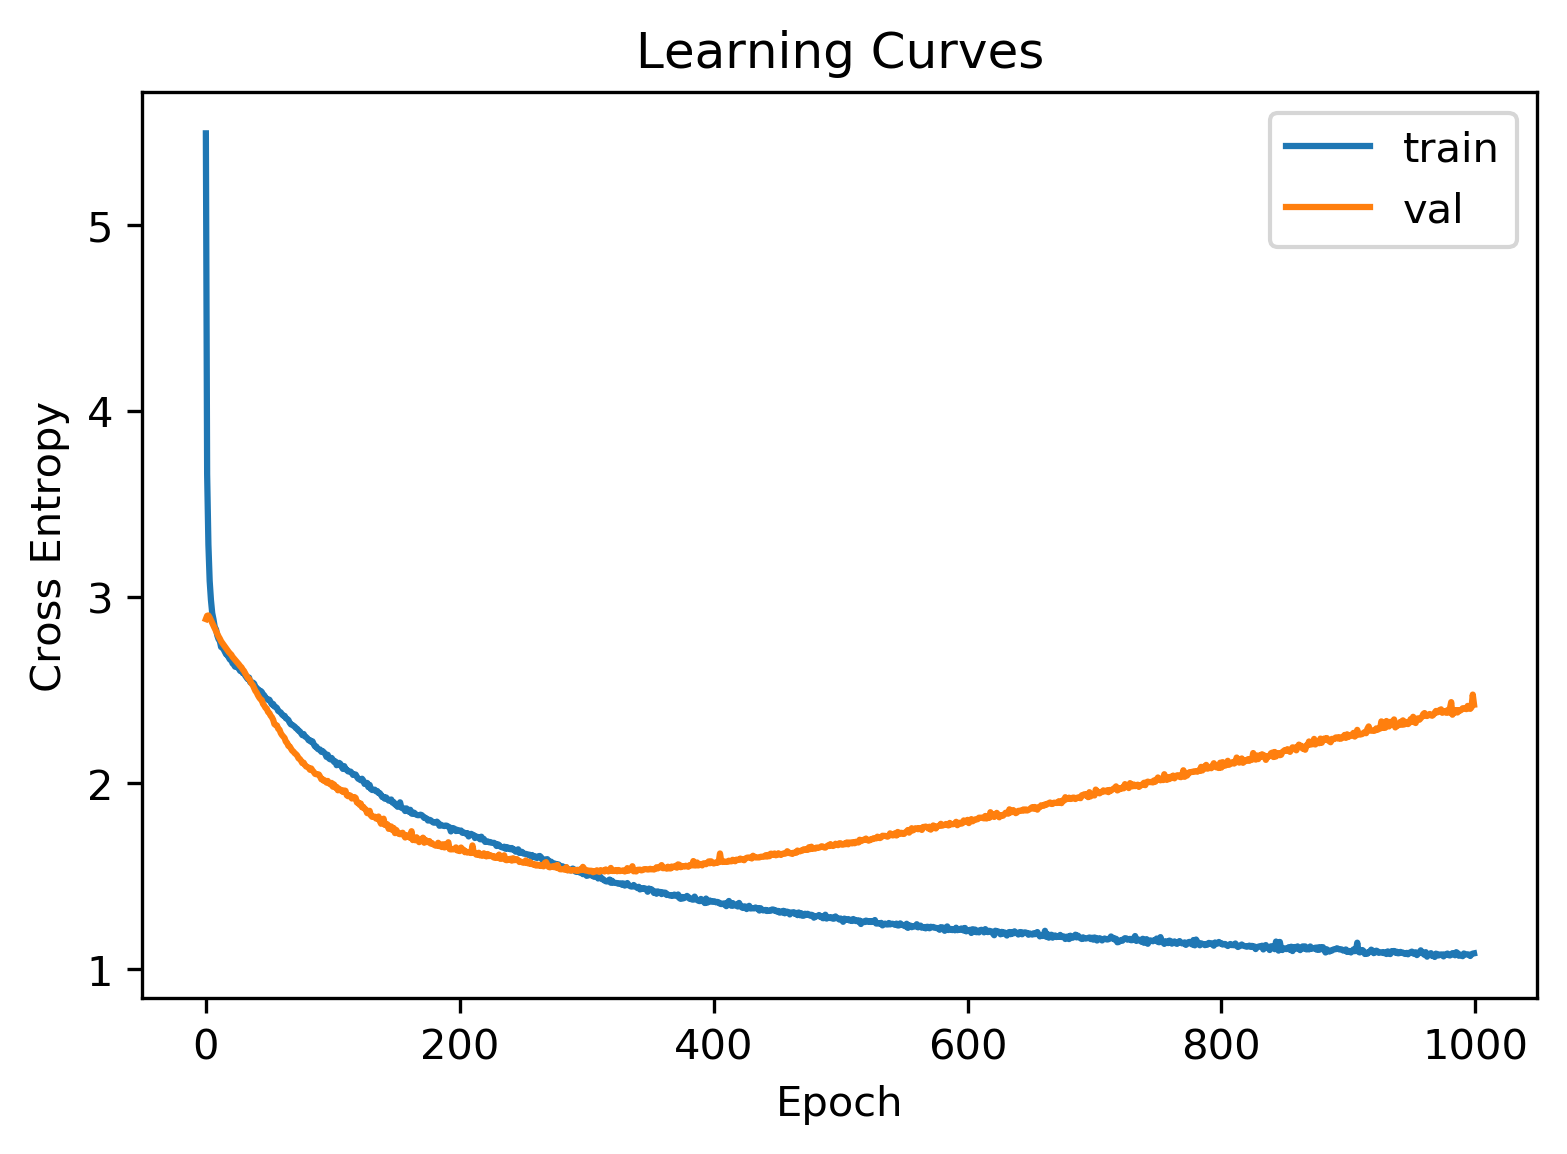

In [93]:
# plot learning curves
plt.figure(dpi=300)
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [94]:
# evaluate the model
loss, acc = model.evaluate(X_test_std, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.620


In [95]:
# predict probabilities for test set
yhat_probs = model.predict(X_test_std, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test_std, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [96]:
print(classification_report(y_test,yhat_classes))

              precision    recall  f1-score   support

           0       0.25      0.01      0.01       140
           1       0.37      0.08      0.13       241
           2       0.75      0.45      0.56       464
           3       0.45      0.82      0.58       802
           4       0.65      0.21      0.32       226
           5       0.41      0.57      0.48       794
           6       0.72      0.52      0.61       352
           7       0.81      0.72      0.76       901
           8       0.00      0.00      0.00       200
           9       0.76      0.83      0.79      2352
          10       0.29      0.07      0.11       158
          11       0.00      0.00      0.00       427
          12       0.00      0.00      0.00       249
          13       0.85      0.90      0.88      1932
          14       0.43      0.63      0.51       246
          15       0.00      0.00      0.00       147
          16       0.46      0.79      0.58      1296
          17       0.00    

C:\Users\57609\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.8))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
model.add(Dense(40, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [98]:
# fit the model
history = model.fit(X_train_std, y_train, epochs=500, batch_size=128, verbose=0, validation_split=0.3)

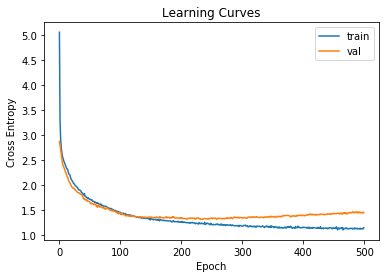

In [99]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [100]:
# evaluate the model
loss, acc = model.evaluate(X_test_std, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.599


In [101]:
# predict probabilities for test set
yhat_probs = model.predict(X_test_std, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test_std, verbose=0)

In [102]:
print(classification_report(y_test,yhat_classes))

              precision    recall  f1-score   support

           0       0.17      0.04      0.06       140
           1       0.25      0.10      0.14       241
           2       0.00      0.00      0.00       464
           3       0.52      0.87      0.65       802
           4       0.14      0.15      0.15       226
           5       0.30      0.60      0.40       794
           6       0.92      0.44      0.60       352
           7       0.76      0.86      0.80       901
           8       0.43      0.20      0.27       200
           9       0.83      0.75      0.79      2352
          10       0.76      0.52      0.62       158
          11       0.81      0.55      0.66       427
          12       0.00      0.00      0.00       249
          13       0.91      0.84      0.87      1932
          14       0.81      0.36      0.50       246
          15       0.00      0.00      0.00       147
          16       0.35      0.64      0.45      1296
          17       0.00    

In [119]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [120]:
# fit the model
history = model.fit(X_train_std, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.3)

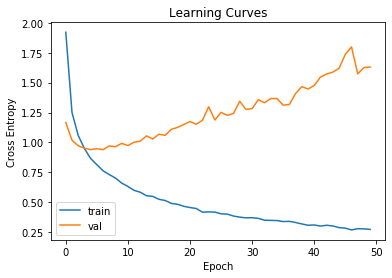

In [121]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [122]:
# evaluate the model
loss, acc = model.evaluate(X_test_std, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.746


In [123]:
# predict probabilities for test set
yhat_probs = model.predict(X_test_std, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test_std, verbose=0)

In [124]:
print(classification_report(y_test,yhat_classes))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55       140
           1       0.44      0.43      0.43       241
           2       0.72      0.64      0.68       464
           3       0.77      0.82      0.79       802
           4       0.63      0.50      0.56       226
           5       0.58      0.56      0.57       794
           6       0.74      0.70      0.72       352
           7       0.86      0.85      0.85       901
           8       0.56      0.48      0.52       200
           9       0.76      0.87      0.81      2352
          10       0.80      0.69      0.74       158
          11       0.77      0.66      0.71       427
          12       0.75      0.72      0.74       249
          13       0.87      0.89      0.88      1932
          14       0.74      0.73      0.73       246
          15       0.55      0.39      0.46       147
          16       0.68      0.76      0.72      1296
          17       0.59    